In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from random import randint

In [18]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")

train = np.array(train)
m, n = train.shape # training examples (m), pixels (784)
np.random.shuffle(train)

train = train.T
X = train[1:] / 255.0 # images (784, m)
y = train[0] # labels (1, m)

test = np.array(test)
test = test.T
y_test, X_test = test[0], test[1:].T / 255.0

In [19]:
def params():
    # he init
    W1 = np.random.randn(10, 784) * np.sqrt(2/784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2/10)
    b2 = np.zeros((10, 1))

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def dReLU(Z):
    return (Z > 0).astype(float)

def softmax(Z2):
    expZ = np.exp(Z2 - np.max(Z2, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def one_hot(y):
    m = y.shape[0]
    arr = np.zeros((10, m))
    arr[y, np.arange(m)] = 1
    return arr

In [20]:
def forward_pass(W1, b1, W2, b2, X):
    Z1 = W1 @ X + b1 # (10, m)
    A1 = ReLU(Z1) # hidden layer 1 (10, m)
    Z2 = W2 @ A1 + b2 # logits, (10, m)
    A2 = softmax(Z2) # output layer normalized based on probability (10, m)

    return A2, Z2, A1, Z1

In [21]:
def cost(A2, y):
    # cross entropy loss
    return -np.mean(np.sum(one_hot(y) * np.log(A2 + 1e-9), axis=1))

def backward_pass(A2, Z2, A1, Z1, W2, W1, y):
    # chain rule dC/dW2, dC/db2
    dZ2 = A2 - one_hot(y) # dC wrt dZ2, (10, m)
    dW2 = dZ2 @ A1.T / m # (10, m) * (m, 10).T => (10, 10), dZ2 wrt dW2
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m # (10, 1)

    # chain rule dC/dW1, dC/db1
    dA1 = W2.T @ dZ2 # (10, 10) * (10, m) => (10, m)
    dZ1 = dA1 * dReLU(Z1) # => (10, m)
    dW1 = dZ1 @ X.T / m  # (10, m) * (m, 784) => (10, 784)
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m # (10, 1)

    return dW1, db1, dW2, db2

def update_params(dW1, db1, dW2, db2, W2, b2, W1, b1):
    # stochastic gradient descent
    alpha = 0.1 # learning rate
    W2 -= dW2 * alpha
    b2 -= db2 * alpha
    W1 -= dW1 * alpha
    b1 -= db1 * alpha

    return W1, b1, W2, b2

def get_accuracy(A2, Y):
    predictions = np.argmax(A2, axis=0)
    return np.mean(predictions == Y) * 100

def gradient_descent(X, Y, iterations):
    W1, b1, W2, b2 = params()
    costs = []
    accuracies = []
    for i in range(iterations):
        A2, Z2, A1, Z1 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_pass(A2, Z2, A1, Z1, W2, W1, Y)
        W1, b1, W2, b2 = update_params(dW1, db1, dW2, db2, W2, b2, W1, b1)
        

        if i % 100 == 0:
            cost_i = cost(A2, Y)
            accuracy_i = round(get_accuracy(A2, Y), 2)
            costs.append(cost_i)
            accuracies.append(accuracy_i)
            print("Iteration:", i)
            print(f"Accuracy: {accuracy_i}%")
            print("Cost:", round(cost_i))
    
    iters = range(0, iterations, 100)


    plt.subplot(211)
    plt.title("Cost")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.plot(iters, costs, color="red")
    
    plt.subplot(212)
    plt.title("Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Iterations")
    plt.plot(iters, accuracies)

    plt.suptitle("Results")
    plt.tight_layout()
    plt.show()

    return W1, b1, W2, b2

Iteration: 0
Accuracy: 9.68%
Cost: 14439
Iteration: 100
Accuracy: 83.16%
Cost: 4015
Iteration: 200
Accuracy: 87.62%
Cost: 2805
Iteration: 300
Accuracy: 88.9%
Cost: 2424
Iteration: 400
Accuracy: 89.65%
Cost: 2234
Iteration: 500
Accuracy: 90.12%
Cost: 2115
Iteration: 600
Accuracy: 90.52%
Cost: 2030
Iteration: 700
Accuracy: 90.82%
Cost: 1965
Iteration: 800
Accuracy: 91.05%
Cost: 1911
Iteration: 900
Accuracy: 91.27%
Cost: 1866
Iteration: 1000
Accuracy: 91.46%
Cost: 1827
Iteration: 1100
Accuracy: 91.6%
Cost: 1792
Iteration: 1200
Accuracy: 91.74%
Cost: 1761
Iteration: 1300
Accuracy: 91.84%
Cost: 1733
Iteration: 1400
Accuracy: 91.95%
Cost: 1708
Iteration: 1500
Accuracy: 92.01%
Cost: 1685
Iteration: 1600
Accuracy: 92.15%
Cost: 1664
Iteration: 1700
Accuracy: 92.2%
Cost: 1645
Iteration: 1800
Accuracy: 92.3%
Cost: 1627
Iteration: 1900
Accuracy: 92.37%
Cost: 1611
Iteration: 2000
Accuracy: 92.44%
Cost: 1597
Iteration: 2100
Accuracy: 92.52%
Cost: 1583
Iteration: 2200
Accuracy: 92.58%
Cost: 1571
Iter

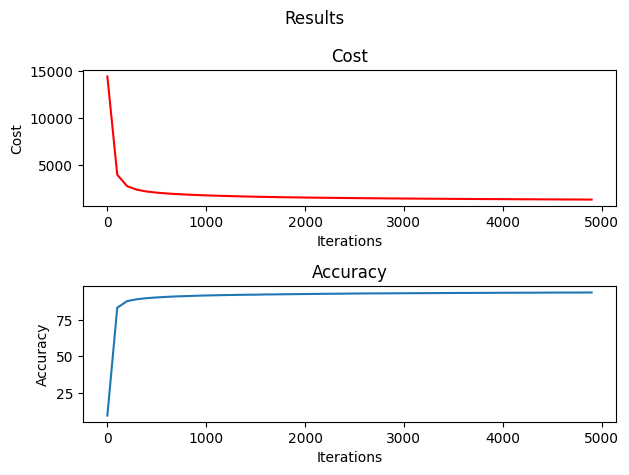

In [22]:
trained_weights = gradient_descent(X, y, 5000)

Prediction: 3
Label: 3


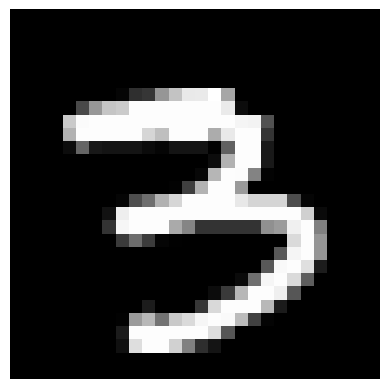

In [23]:
def predict(i, W1, b1, W2, b2):
    A2, _, _, _ = forward_pass(W1, b1, W2, b2, X_test.T)
    prediction = np.argmax(A2, axis=0)[i]
    label = y_test[i]
    plt.imshow(X_test[i].reshape((28, 28)), cmap="gray")
    plt.axis(False)
    print("Prediction:", int(prediction))
    print("Label:", int(label))

predict(randint(1, 10000), *trained_weights)